<a href="https://colab.research.google.com/github/wildcat26/Deep-Learning-Assignments/blob/master/v1_CNN_DL_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Will see if normalization improves accuracy
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 6s 0us/step


In [0]:
validation_images = train_images[:10000]
validation_labels = train_labels[:10000]

train_images = train_images[10000:]
train_labels = train_labels[10000:]

# print (np.shape(validation_images))
# print (np.shape(validation_labels))
# print (np.shape(train_labels))
# print (np.shape(train_images))


In [0]:
# dataset is already shuffled randomly

[8]


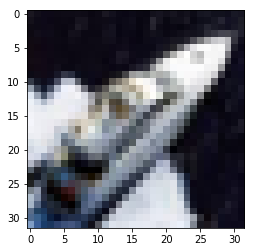

In [6]:
plt.figure(figsize=(4,4))
plt.imshow(train_images[0])
print(train_labels[0])
plt.show()

# seems like a ship

In [7]:
model_1 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_1.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))

# model_1.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()


W1102 04:59:55.814208 139802957391744 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [11]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_1 = os.path.dirname("training_1/training_1.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_1, save_weights_only=True)

model_1.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback])

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 68s 2ms/sample - loss: 1.0516 - acc: 0.6297 - val_loss: 1.2698 - val_acc: 0.5704
Epoch 2/10
30000/30000 [==============================] - 68s 2ms/sample - loss: 0.9669 - acc: 0.6603 - val_loss: 1.0826 - val_acc: 0.6234
Epoch 3/10
30000/30000 [==============================] - 67s 2ms/sample - loss: 0.8924 - acc: 0.6890 - val_loss: 1.0890 - val_acc: 0.6272
Epoch 4/10
30000/30000 [==============================] - 67s 2ms/sample - loss: 0.8266 - acc: 0.7114 - val_loss: 1.0349 - val_acc: 0.6530
Epoch 5/10
30000/30000 [==============================] - 66s 2ms/sample - loss: 0.7699 - acc: 0.7290 - val_loss: 1.0708 - val_acc: 0.6482
Epoch 6/10
30000/30000 [==============================] - 67s 2ms/sample - loss: 0.7205 - acc: 0.7482 - val_loss: 1.0839 - val_acc: 0.6401
Epoch 7/10
30000/30000 [==============================] - 66s 2ms/sample - loss: 0.6842 - acc: 0.7582 - val_loss: 1.

In [12]:
model_2 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_2.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D((3, 3)))

# model_2.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_2.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((3, 3)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_2 = os.path.dirname("training_2/training_2.ckpt")
cp_callback_2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_2, save_weights_only=True)

model_2.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_2])

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 38s 1ms/sample - loss: 1.8073 - acc: 0.3255 - val_loss: 1.5701 - val_acc: 0.4265
Epoch 2/10
 3424/30000 [==>...........................] - ETA: 30s - loss: 1.5293 - acc: 0.4419

In [0]:
model_3 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))

# model_3.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()


In [0]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_3 = os.path.dirname("training_3/training_3.ckpt")
cp_callback_3 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_3, save_weights_only=True)

model_3.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_3])

In [0]:
model_4 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))

# model_4.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()


In [0]:
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_4 = os.path.dirname("training_4/training_4.ckpt")
cp_callback_4 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_4, save_weights_only=True)

model_4.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_4])

In [0]:
# Plot the accuracy and loss vs iteration for training data

In [0]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
